In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline


# Информация о датасете

Набор данных представляет собой список из 90836 сертифицированных NASA астероидов, которые классифицируются как ближайшие к Земле объекты. Датасет содержит различные параметры /особенности, на основе которых конкретный астероид можно отнести к классу опасных или неопасных. Набор данных содержит 10 признаков.

# Загрузка и анализ данных

In [4]:
url = "https://raw.githubusercontent.com/mihanik2828/University-Machine_Learning/main/NASA2.csv"
data_raw = pd.read_csv(url, sep=',', engine='python')
data_raw.shape

(90836, 10)

Размеры таблицы соответствуют количеству строк, каждая из которых относится к определенному астероиду и количество столбцов, каждый из которых отвечает за конкретный признак. Наш набор данных содержит 90836 строк и 10 столбцов.

In [5]:
data_raw.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True



#### Признаки:

1. id - уникальный идентификатор для каждого астероида
2. name - название, данное NASA
3. est_diameter_min - минимальный расчетный диаметр в километрах
4. est_diameter_max - максимальный расчетный диаметр в километрах
5. relative_velocity - скорость относительно Земли
6. miss_distance - пройденное расстояние в километрах
7. orbiting_body - планета, вокруг которой вращается астероид
8. sentry_object - входит или нет в состав sentry (автоматизированной системы мониторинга столкновений)
9. absolute_magnitude - описывает внутреннюю светимость
10. hazardous - показывает, является ли астероид вредным или нет


Выведем информацию о столбцах, чтобы узнать тип значений в них

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


Признаки "sentry_object" и "hazardous" - бинарные (типа bool), "name" и "orbiting_body" - категориальные (типа object), остальные признаки - количественные (типа int64 и float64 ).

У признака "hazardous" можно заметить несбалансированность классов: обьектов класса 0 сильно больше, чем объектов класса 1

In [7]:
data_raw['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [8]:
data_raw['sentry_object'] = data_raw['sentry_object'].astype('float32')
data_raw['hazardous'] = data_raw['hazardous'].astype('float32')

# Обработка категориальных признаков

Заменим тип Object некоторых признаков на специальный тип, который предназначен для хранения категориальных значений

In [9]:
data_raw['name'] = data_raw['name'].astype('category')
data_raw['orbiting_body'] = data_raw['orbiting_body'].astype('category')

In [10]:
data_raw['name'].dtype

CategoricalDtype(categories=['(1983 LC)', '(1986 NA)', '(1988 NE)', '(1989 AZ)',
                  '(1991 GO)', '(1991 TF3)', '(1991 VG)', '(1992 JD)',
                  '(1992 SZ)', '(1993 DA)',
                  ...
                  '96744 (1999 OW3)', '97725 (2000 GB147)', '9856 (1991 EE)',
                  '98943 (2001 CC21)', '99248 (2001 KY66)',
                  '9950 ESA (1990 VB)', '99799 (2002 LJ3)', '99907 (1989 VA)',
                  '99935 (2002 AV4)', '99942 Apophis (2004 MN4)'],
, ordered=False)

In [11]:
data_raw['orbiting_body'].dtype

CategoricalDtype(categories=['Earth'], ordered=False)

In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  90836 non-null  int64   
 1   name                90836 non-null  category
 2   est_diameter_min    90836 non-null  float64 
 3   est_diameter_max    90836 non-null  float64 
 4   relative_velocity   90836 non-null  float64 
 5   miss_distance       90836 non-null  float64 
 6   orbiting_body       90836 non-null  category
 7   sentry_object       90836 non-null  float32 
 8   absolute_magnitude  90836 non-null  float64 
 9   hazardous           90836 non-null  float32 
dtypes: category(2), float32(2), float64(5), int64(1)
memory usage: 6.3 MB


# Обработка выбросов

Построим диаграммы рассеивания для признаков: absolute_magnitude и est_diameter_min и аналогично для absolute_magnitude и est_diameter_max

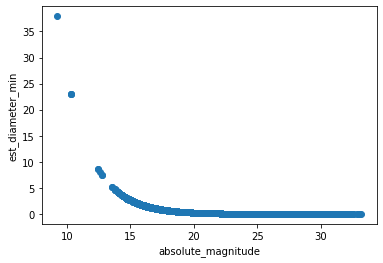

In [13]:
plt.scatter(data_raw['absolute_magnitude'], data_raw['est_diameter_min'], alpha=1)
plt.xlabel('absolute_magnitude')
plt.ylabel('est_diameter_min')
pass

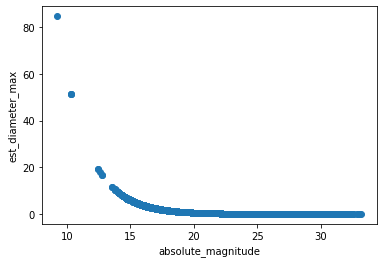

In [14]:
plt.scatter(data_raw['absolute_magnitude'], data_raw['est_diameter_max'], alpha=1)
plt.xlabel('absolute_magnitude')
plt.ylabel('est_diameter_max')
pass

Видим, что основная масса точек расположена в нижней части графика, но некоторые точки сильно выбиваются из общей массы как в первом случае, так и во втором.

Аналогично проверим зависимость скорости от пройденного растояния и скорости от диаметра.

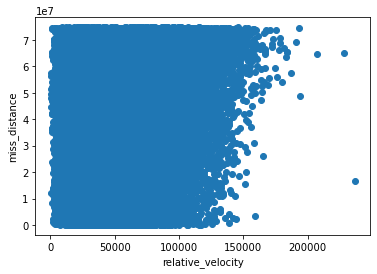

In [15]:
plt.scatter(data_raw['relative_velocity'], data_raw['miss_distance'], alpha=1)
plt.xlabel('relative_velocity')
plt.ylabel('miss_distance')
pass

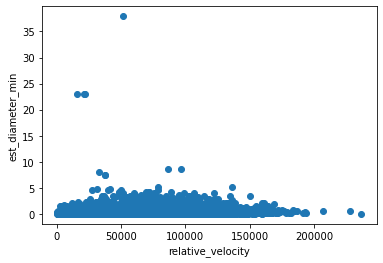

In [16]:
plt.scatter(data_raw['relative_velocity'], data_raw['est_diameter_min'], alpha=1)
plt.xlabel('relative_velocity')
plt.ylabel('est_diameter_min')
pass

Также видим, что есть некоторые точки, которые сильно выбиваются из общей массы. Для обнаружения выбросов найдем квантили для признаков est_diameter_max, est_diameter_min и relative_velocity:

In [17]:
data_raw['est_diameter_max'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     0.021579
0.500     0.108153
0.700     0.259442
0.900     0.682402
0.950     1.052059
0.999     6.339281
1.000    84.730541
Name: est_diameter_max, dtype: float64

In [18]:
data_raw['est_diameter_min'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     0.009651
0.500     0.048368
0.700     0.116026
0.900     0.305179
0.950     0.470495
0.999     2.835012
1.000    37.892650
Name: est_diameter_min, dtype: float64

In [19]:
data_raw['relative_velocity'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     19497.241740
0.500     44190.117890
0.700     58646.867149
0.900     82071.928548
0.950     95214.588889
0.999    153758.426260
1.000    236990.128088
Name: relative_velocity, dtype: float64

Для признака est_diameter_max уберем значения, которые превышают значения квантиля равное 0.999, аналогично сделаем и для остальных 2 признков

In [20]:
rows_to_drop = data_raw[
    (data_raw['est_diameter_min'] > data_raw['est_diameter_min'].quantile(0.999)) | (data_raw['est_diameter_max'] > data_raw['est_diameter_max'].quantile(0.999)) | (data_raw['relative_velocity'] > data_raw['relative_velocity'].quantile(0.999))].index
data1 = data_raw.drop(rows_to_drop)
data1.shape

(90656, 10)

# Визуализация и описательная статистика

In [21]:
data1.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
count,9.065600e+04,90656.000000,90656.000000,90656.000000,9.065600e+04,90656.000000,90656.000000,90656.000000
mean,1.440276e+07,0.122495,0.273908,47922.620144,3.703208e+07,0.000143,23.540463,0.096960
std,2.088387e+07,0.205174,0.458783,25005.237881,2.234861e+07,0.011973,2.878255,0.295832
min,2.000719e+06,0.000609,0.001362,203.346433,6.745533e+03,0.000000,14.860000,0.000000
25%,3.449132e+06,0.019256,0.043057,28586.911303,1.718138e+07,0.000000,21.370000,0.000000
50%,3.748469e+06,0.048368,0.108153,44138.526799,3.779902e+07,0.000000,23.700000,0.000000
75%,3.884240e+06,0.141434,0.316257,62828.305287,5.648681e+07,0.000000,25.700000,0.000000
max,5.427591e+07,2.835012,6.339281,153752.342038,7.479865e+07,1.000000,33.200000,1.000000


- count - количество значений для каждого признака
- mean - среднее значение
- std - стандартное отклонение
- min/max - минимальное / максимальное значение
- 25% - первый квартиль
- 50% - медиана
- 75% - третий квартиль

In [22]:
data1.describe(include=['category'])

,name,orbiting_body
count,90656,90656
unique,27374,1
top,469219 Kamo`oalewa (2016 HO3),Earth
freq,43,90656


Для категориальных признаков мы получили:

- count - количество значений.
- unique - количество уникальных значений.
- top - наиболее встречающееся значение.
- freq - частота наиболее встречающегося значения.

## Вычислим матрицу корреляции

In [23]:
corr_matrix = data1.corr()
corr_matrix

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.201987,-0.201987,-0.057510,-0.055825,-0.001900,0.276647,-0.123278
est_diameter_min,-0.201987,1.000000,1.000000,0.304737,0.194929,0.003518,-0.736269,0.263286
est_diameter_max,-0.201987,1.000000,1.000000,0.304737,0.194929,0.003518,-0.736269,0.263286
relative_velocity,-0.057510,0.304737,0.304737,1.000000,0.325950,0.002217,-0.350634,0.189198
miss_distance,-0.055825,0.194929,0.194929,0.325950,1.000000,0.000326,-0.263000,0.041377
sentry_object,-0.001900,0.003518,0.003518,0.002217,0.000326,1.000000,-0.005046,0.002302
absolute_magnitude,0.276647,-0.736269,-0.736269,-0.350634,-0.263000,-0.005046,1.000000,-0.366353
hazardous,-0.123278,0.263286,0.263286,0.189198,0.041377,0.002302,-0.366353,1.000000


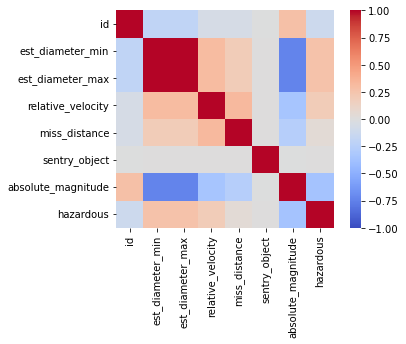

In [24]:
corr_mat = data1.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

In [25]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)
               ).stack().sort_values(ascending=False)

est_diameter_min  est_diameter_max    1.0
dtype: float64

Признаки est_diameter_min и est_diameter_max имеют коэффициент корреляции равный 1, что логично, так как это прямопропорциональные признаки. Остальные признаки плохо коррелируют друг с другом

Рассмотрим категориальный признак "hazardous", который показывает, является астероид опасным или нет.

In [26]:
data1['hazardous'].value_counts()

0.0    81866
1.0     8790
Name: hazardous, dtype: int64

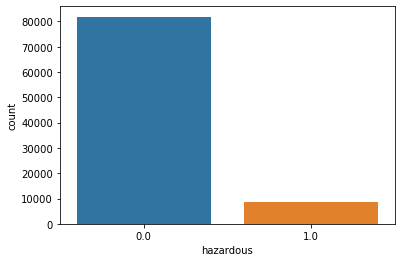

In [27]:
sns.countplot(x='hazardous', data=data1)
pass

Как можем заметить, количество 0 примерно в 10 раз выше, чем 1, что означает, что опасных астероидов намного меньше


# Обработка категориальных значений

Посмотрим, сколько категорий содержат категориальные признаки

In [28]:
data_raw['orbiting_body'].unique()

['Earth']
Categories (1, object): ['Earth']

In [29]:
data_raw['name'].unique()

['162635 (2000 SS164)', '277475 (2005 WK4)', '512244 (2015 YE18)', '(2012 BV13)', '(2014 GE35)', ..., '(2017 OL68)', '(2022 GA4)', '(2021 WR3)', '(2015 VK142)', '(1999 LV7)']
Length: 27423
Categories (27423, object): ['(1983 LC)', '(1986 NA)', '(1988 NE)', '(1989 AZ)', ..., '99799 (2002 LJ3)', '99907 (1989 VA)', '99935 (2002 AV4)', '99942 Apophis (2004 MN4)']

В признаке 'name' слишком большое значение категорий, поэтому мы удалим его из рассмотрения

In [30]:
del data_raw['name']

In [31]:
data1 = pd.get_dummies(data_raw)
print(data1.shape)
data1.head()

(90836, 9)


,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous,orbiting_body_Earth
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,0.0,16.73,0.0,1
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,0.0,20.00,1.0,1
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,0.0,17.83,0.0,1
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,0.0,22.20,0.0,1
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,0.0,20.09,1.0,1


# Нормализация

Проведем нормализацию с помощью линейного преобразования к отрезку [0,1]

In [32]:
data_norm = (data1 - data1.min(axis=0)) / (data1.max(axis=0) - data1.min(axis=0))
data_norm.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous,orbiting_body_Earth
count,90836.000000,90836.000000,90836.000000,90836.000000,90836.000000,90836.000000,90836.000000,90836.000000,0.0
mean,0.236869,0.003347,0.003347,0.202138,0.495505,0.000143,0.596458,0.097318,NaN
std,0.399270,0.007878,0.007878,0.106819,0.298856,0.011962,0.120738,0.296392,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.027693,0.000492,0.000492,0.120005,0.230026,0.000000,0.505215,0.000000,NaN
50%,0.033437,0.001260,0.001260,0.185765,0.505935,0.000000,0.603671,0.000000,NaN
75%,0.036032,0.003768,0.003768,0.264881,0.755994,0.000000,0.687109,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [33]:
data_norm.isna().sum()

id                         0
est_diameter_min           0
est_diameter_max           0
relative_velocity          0
miss_distance              0
sentry_object              0
absolute_magnitude         0
hazardous                  0
orbiting_body_Earth    90836
dtype: int64

Так как у признака orbiting_body_Earth все значения NaN, удалим этот признак из рассмотрения

In [34]:
del data_norm["orbiting_body_Earth"]

In [35]:
data_norm.columns

Index(['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'sentry_object', 'absolute_magnitude', 'hazardous'],
      dtype='object')

In [36]:
data_norm.isna().sum()

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

# Обучение

### Выбор обучающей и тестовой выборок

Для классификации разобьем данные на обучающую и тестовую выборки. За обучающую возьмем 75% данных, 25% - за тестовую

In [37]:
X = data_norm.drop (['hazardous'], axis=1) 
y = data1['hazardous']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test, _ = X_test.shape 

N_train, N_test

(68127, 22709)

# KNN

По умолчанию берется 5 соседей

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train.values)
y_train_predict = knn.predict(X_train.values)
y_test_predict = knn.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 93.28%, Test: 90.42%
MSE: Train 0.07, Test 0.10


Возьмем 7 соседей

In [41]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train.values, y_train.values)
y_train_predict = knn_7.predict(X_train.values)
y_test_predict = knn_7.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 92.70%, Test: 90.41%
MSE: Train 0.07, Test 0.10


Точность на тренировочной и тестовой выборках уменьшилась. Попробуем еще 10 соседей

In [42]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train.values, y_train.values)
y_train_predict = knn_10.predict(X_train.values)
y_test_predict = knn_10.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 91.95%, Test: 90.92%
MSE: Train 0.08, Test 0.09


Возьмем 3 соседа

In [43]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train.values, y_train.values)
y_train_predict = knn_3.predict(X_train.values)
y_test_predict = knn_3.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))


Train: 94.48%, Test: 89.68%
MSE: Train 0.06, Test 0.10


Результат на тренировочной выборке лучше, чем в предыдущих случаях, но на тестовой выборке показатель ухудшился

# Random Forest

Возьмем алгоритм - дерево решений и сравним полученные результаты

In [44]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_train_score = 100 * dct.score(X_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100 * dct.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))


Tree Depth: 46
Tree Leaves: 3664
Accuracy. Train : 100.00%, Test: 93.22%. 


Максимальная глубина 46. Уменьшим ее до 20

In [45]:
dct_20 = DecisionTreeClassifier(max_depth=20)
dct_20.fit(X_train,y_train)
dct_train_score = 100 * dct_20.score(X_train, y_train)
print ('Tree Depth:', dct_20.get_depth())
print ('Tree Leaves:', dct_20.get_n_leaves())
dct_test_score = 100 * dct_20.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 20
Tree Leaves: 2194
Accuracy. Train : 97.37%, Test: 92.79%. 


Значения на тестовой и тренировочной выборках снизились. Возьмем глубину 35

In [46]:
dct_35 = DecisionTreeClassifier(max_depth=35)
dct_35.fit(X_train,y_train)
dct_train_score = 100 * dct_35.score(X_train, y_train)
print ('Tree Depth:', dct_35.get_depth())
print ('Tree Leaves:', dct_35.get_n_leaves())
dct_test_score = 100 * dct_35.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 35
Tree Leaves: 3610
Accuracy. Train : 99.90%, Test: 93.21%. 


На тренировочной и тестовой выборках значения уменьшились по сравнению с первоначальным. Возьмем глубину 40

In [47]:
dct_40 = DecisionTreeClassifier(max_depth=40)
dct_40.fit(X_train,y_train)
dct_train_score = 100 * dct_40.score(X_train, y_train)
print ('Tree Depth:', dct_40.get_depth())
print ('Tree Leaves:', dct_40.get_n_leaves())
dct_test_score = 100 * dct_40.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 40
Tree Leaves: 3655
Accuracy. Train : 99.97%, Test: 93.08%. 


Значения не стали лучше по сравнению с первоначальной.

# Вывод


В результате решения задачи классификации мы получили:

- Алгоритм дерева решений сильно выигрывает по точности у метода KNN
- При понижении числа соседей, точность метода KNN возрастает на тренировочной выборке, но уменьшается на тестовой 
- Лучший результат в методе дерева решений на тренировочной выборке был достигнут при глубине 46, на тестовой при глубине 35. При уменьшении глубины точность понижалась

# Вторая часть

### Обучение модели

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [50]:
model = MLPClassifier(
    hidden_layer_sizes=(50,),
    solver='adam',
    activation='relu',
    random_state=3,
    max_iter=1000
)

In [51]:
%%time
model.fit(X_train, y_train)

CPU times: total: 2min 31s
Wall time: 38.1 s


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=3)

Проверка качества классификатора и точности на обучающей и тестовой выборках

In [52]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [53]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int64'), y_test_prediction) * 100))

Train: 91.46% Test: 91.41%


## Подбор оптимального альфа

In [54]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_prediction = mlp_model.predict(X_train)
    y_test_prediction = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_prediction))
    test_err.append(np.mean(y_test!= y_test_prediction))
    train_acc.append(sklearn.metrics.accuracy_score(y_train, y_train_prediction))
    test_acc.append(sklearn.metrics.accuracy_score(y_test, y_test_prediction))
     

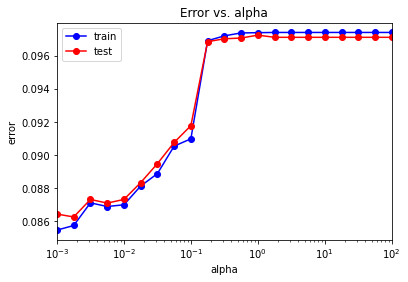

In [55]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

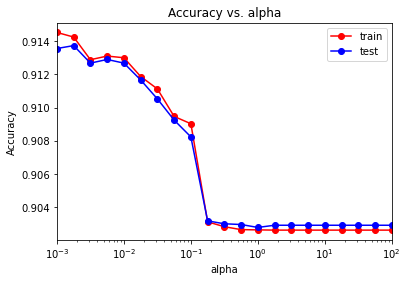

In [56]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Судя по графикам у нас не наблюдается ни недообучения, ни переобучения. 

Минимальное значение ошибки:

In [57]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.08547272006693382 0.08626535734730724


Оптимальное значение альфа:

In [58]:
alpha_optarr = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_optarr[0]
print(alpha_opt)

0.0017782794100389228


Классификатор с учетом оптимального значения альфа:

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [60]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(80,),
                          solver='adam', activation='relu', max_iter=5000, random_state=7)
mlp_model.fit(X_train, y_train)

y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)

print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train, y_train_prediction)
      * 100, accuracy_score(y_test.astype('int64'), y_test_prediction) * 100))

Train: 91.40% Test: 91.31%


## Подбор оптимального числа нейронов

In [62]:
neuron_count_array = np.linspace(10, 300, 30).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt,
        hidden_layer_sizes=(neuron_count,),
        solver='adam',
        activation='relu',
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    test_error.append(np.mean(y_test != y_test_prediction))
    train_error.append(np.mean(y_train != y_train_prediction))
    test_acc.append(accuracy_score(y_test, y_test_prediction))
    train_acc.append(accuracy_score(y_train, y_train_prediction))

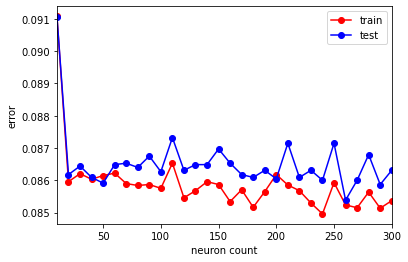

In [63]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

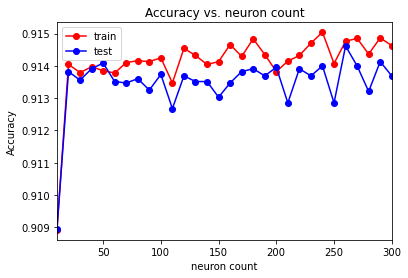

In [64]:

plt.plot(neuron_count_array, train_acc, 'r-o', label='train')
plt.plot(neuron_count_array, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.title('Accuracy vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('Accuracy')
plt.legend()

В данном случае также не наблюдается ни недообучения, ни переобучения. Колебания происходятся достаточно синхронно.

In [65]:
min_test_error = np.min(test_error)
neuron_opt = neuron_count_array[test_error == min_test_error][0]
print('Optimal number of neurons: {}'.format(neuron_opt))

Optimal number of neurons: 260


In [66]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=2000, random_state=90)
mlp_model.fit(X_train, y_train)

y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)

In [67]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train, y_train_prediction)
      * 100, accuracy_score(y_test, y_test_prediction) * 100))

Train: 91.38% Test: 91.34%


## Подбор оптимального числа нейронов и значения альфа

In [68]:
neuron_arr = np.linspace(10, 300, 5).astype(int)
alpha_arr = np.logspace(-3, 2, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
neuron_alpha_opt = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(neuron,),
                                  solver='adam', activation='relu', max_iter=1500, random_state=3)
        mlp_model.fit(X_train, y_train)

        y_train_prediction = mlp_model.predict(X_train)
        y_test_prediction = mlp_model.predict(X_test)

        train_err.append(np.mean(y_train != y_train_prediction))
        test_err.append(np.mean(y_test != y_test_prediction))
        train_acc.append(accuracy_score(y_train, y_train_prediction))
        test_acc.append(accuracy_score(y_test, y_test_prediction))
        neuron_alpha_opt.append([neuron, alpha])

In [69]:
min_test_err = np.min(test_err)
i, = np.where(test_err == min_test_err)
neuron_opt, alpha_opt = neuron_alpha_opt[i[0]]
print("Neuron count opt:", neuron_opt)
print("Alpha opt: ", alpha_opt)

Neuron count opt: 227
Alpha opt:  0.001


Классификатор с учетом оптимальных значений

In [70]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=2000, random_state=93)
mlp_model.fit(X_train, y_train)

y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)

In [71]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train, y_train_prediction)
      * 100, accuracy_score(y_test, y_test_prediction) * 100))

Train: 91.46% Test: 91.39%


### Матрица рассогласования

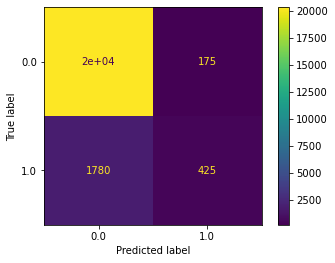

In [72]:
confusion = confusion_matrix(y_test, y_test_prediction, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
display.plot()
plt.show()
pass

# Выводы

Оценив результаты работы на тестовой и тренировочной выборках при различных коэфициентах и количествах нейронов, можно проследить несильное изменение точности, что свидетельствует о том, что явной зависимости точности от этих параметров нет. Кроме того, не наблюдалось переобучение или недообучение. 